In [1]:
import numpy as np
import pandas as pd 

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [4]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# lets find out the percentage of missing data
missing = (train_data.isnull().count() - train_data.count()) / train_data.isnull().count() * 100
missing = pd.DataFrame(data = { 'original': train_data.isnull().count() , 'missing' : train_data.isnull().count() - train_data.count(), '%' : missing})
missing.sort_values(by= '%', ascending = False).head(10)

,original,missing,%
Cabin,891,687,77.104377
Age,891,177,19.865320
Embarked,891,2,0.224467
PassengerId,891,0,0.000000
Survived,891,0,0.000000
Pclass,891,0,0.000000
Name,891,0,0.000000
Sex,891,0,0.000000
SibSp,891,0,0.000000
Parch,891,0,0.000000


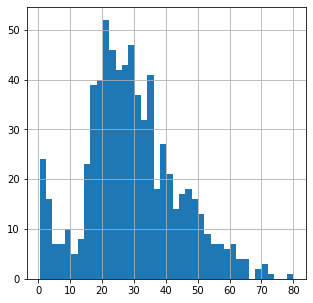

In [9]:
# Lets see Age distribution once
%matplotlib inline
import matplotlib.pyplot as plt
train_data['Age'].hist(bins= 40, figsize= (5, 5))
plt.show()

In [10]:
# trying to explore the data with respect to Age and Sex 

# but before that let us plot some graph 
# let's find the Age distribution of passengers who survived in Male and Female
women = train_data[train_data['Sex'] == 'female']
men = train_data[train_data['Sex'] == 'male']

Survived_women_Age_dist = women[women['Survived'] == 1].Age.dropna()
Survived_men_Age_dist = men[men['Survived'] == 1].Age.dropna()

# let's find the Age distribution of passengers who died in Male and Female
Died_women_Age_dist = women[women['Survived'] == 0].Age.dropna()
Died_men_Age_dist = men[men['Survived'] == 0].Age.dropna()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Female')

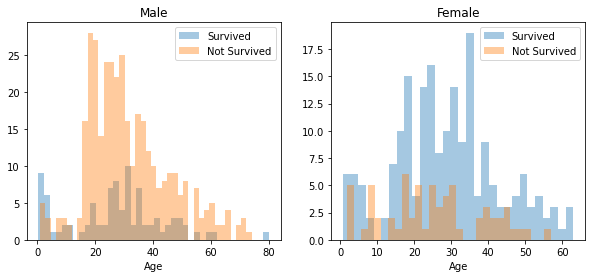

In [11]:
# Plot the data

import seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols= 2, figsize = (10, 4))

ax = sns.distplot(Survived_men_Age_dist, bins = 40, label= 'Survived', ax = axes[0], kde= False)
ax = sns.distplot(Died_men_Age_dist, bins = 40, label = 'Not Survived', ax= axes[0], kde = False)
ax.legend()
ax.set_title('Male')

ax = sns.distplot(Survived_women_Age_dist, bins = 30, label= 'Survived', ax= axes[1], kde= False)
ax = sns.distplot(Died_women_Age_dist, bins= 30, label = 'Not Survived', ax= axes[1], kde= False)
ax.legend()
ax.set_title('Female')

(1) It can clearly see that survival of female is higher as compare to male.
(2) for men, age between 20-45 years survival rate is quite good enough whereas, in women, all over survival rate is pretty good 
(3) as the age increase survival rate is low/decrease in men 

C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


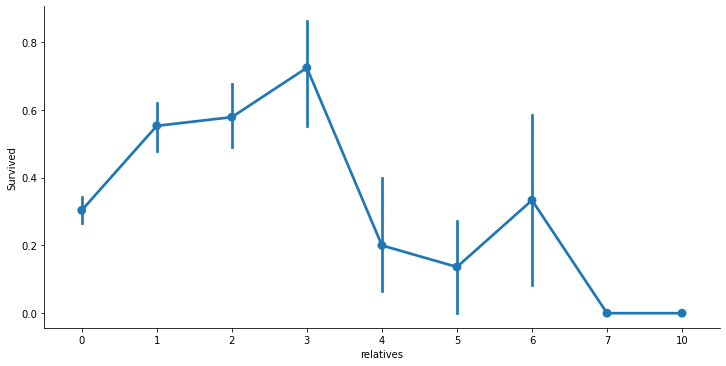

In [12]:
# Lets see how having number of relatives affects the survival rates, by adding it as a feature in a photocopy dataset.
train_copy = train_data.copy()
train_copy['relatives'] = train_data['SibSp'] + train_data['Parch']
axes = sns.factorplot('relatives','Survived', 
                      data=train_copy,kind= 'point' , aspect = 2 )

we see here passengers with 1-3 relatives had higher chances of surival but it droped down for people with more than 3(except 6) passengers with 0 relative had only 30% of them survived.

In [13]:
#Lets see how many were people with 0 relatives and also check the same for 6 to see if they are significant in number and lucky as well.
train_copy['relatives'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: relatives, dtype: int64

Lets see the correlation of each feature with the Survival rate using .corr() function.

In [14]:
corr =  train_copy.corr()
corr['Survived'].sort_values(ascending = False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
relatives      0.016639
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

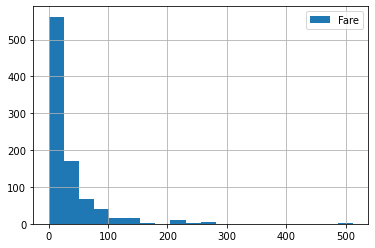

In [15]:
plot = train_data['Fare'].hist(bins = 20, label= 'Fare')
plot.legend()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


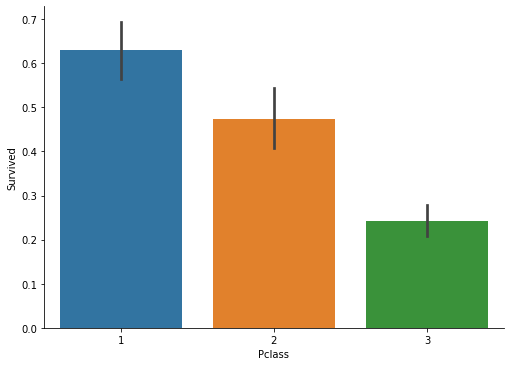

In [16]:
sns.factorplot('Pclass', 'Survived', data= train_data, kind=  'bar', aspect= 1.4)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


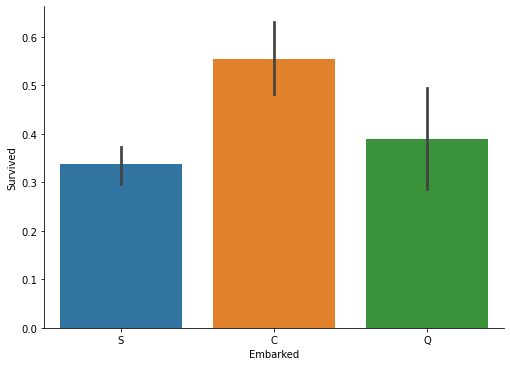

In [17]:
sns.factorplot('Embarked', 'Survived', data= train_data, kind=  'bar', aspect= 1.4)

In [18]:
# Before doing any preprocessing to the data let's just keep an original copy of it separate.
train_original = train_data.copy()
train_data = train_data.drop(['Survived'], axis = 1)

In [19]:
# before proceeding we should have a look at the features
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [20]:
from sklearn.base import BaseEstimator, TransformerMixin

class CustomTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, DoTransform= True):
        self.DoTransform = DoTransform
    def fit(self, X, y= None):
        return self
    def transform(self, X, y= None):
            if self.DoTransform == True:
                X['AgeBucket'] = (X['Age'] // 15 * 15).astype('Int64')
                X['relatives'] = X['SibSp'] + X['Parch']
                X['Not_Alone'] = X['relatives'].where(X['relatives'] == 0, 1)
                X.drop(['Age'], axis = 1, inplace= True)
                X['Fare'] = pd.qcut(X['Fare'], 6, labels = False)
                return X
            else:
                return X



In [21]:
# Lets seperately list out our numerical and categorical attributes first which we need and remove what we don't need.
train_num = train_data.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'Cabin'], axis = 1)
num_attribs = list(train_num)
train_cat = train_data.drop(num_attribs, axis = 1)
train_cat = train_cat.drop(['Name', 'Ticket', 'Cabin'], axis = 1)
cat_attribs = list(train_cat)
print(cat_attribs)
print(num_attribs)
train_cat

['Sex', 'Embarked']
['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
886,male,S
887,female,S
888,female,S
889,male,C


In [22]:
# Now lets create a pipeline that will run our transformers - both for numerical and categorical attributes
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

num_pipeline = Pipeline([
    ('custom_tr', CustomTransformer(DoTransform = True)),
    ('impute', SimpleImputer(strategy= 'median')),
    ])

train_num_tr = num_pipeline.fit_transform(train_num)
train_num_tr[0:5, :]

# Above 2 lines of code are just to run the current cell to see if it's working fine. We will collectively run the whole 
# pipeline later

array([[ 1.,  3.,  1.,  0.,  0., 15.,  1.,  1.],
       [ 2.,  1.,  1.,  0.,  5., 30.,  1.,  1.],
       [ 3.,  3.,  0.,  0.,  1., 15.,  0.,  0.],
       [ 4.,  1.,  1.,  0.,  5., 30.,  1.,  1.],
       [ 5.,  3.,  0.,  0.,  1., 30.,  0.,  0.]])

In [23]:
cat_pipeline = Pipeline([
    ('Embarked', SimpleImputer(strategy= 'most_frequent')),
    ('cat_encode', OneHotEncoder(sparse = False)),
])
train_cat_tr =  cat_pipeline.fit_transform(train_cat)
train_cat_tr

array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0.]])

In [25]:
# # We wil finally run both pipelines here using ColumnTransformer by passing numerical and categorical part of the data
# whereever it's required
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
    ('num_transform', num_pipeline, num_attribs),
    ('cat_transform', cat_pipeline, cat_attribs),
    
])
final_train_data = full_pipeline.fit_transform(train_data)
final_train_data.shape

(891, 13)

In [27]:
# Now let's delete passengerID from the numerical data refering to its index using numpy.delete(arr, index, axis)
# We didn't delete it in our custom transformer because we will run the same for test data as well, and we need
# passengerID in the test set 

X_train = np.delete(final_train_data, 0, 1) 
print(X_train.shape)
X_train[:5, :]

(891, 12)


array([[ 3.,  1.,  0.,  0., 15.,  1.,  1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  1.,  0.,  5., 30.,  1.,  1.,  1.,  0.,  1.,  0.,  0.],
       [ 3.,  0.,  0.,  1., 15.,  0.,  0.,  1.,  0.,  0.,  0.,  1.],
       [ 1.,  1.,  0.,  5., 30.,  1.,  1.,  1.,  0.,  0.,  0.,  1.],
       [ 3.,  0.,  0.,  1., 30.,  0.,  0.,  0.,  1.,  0.,  0.,  1.]])

In [28]:
y_train = train_original['Survived']

In [30]:
# importing some libraries 
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [31]:
rfc = RandomForestClassifier(n_estimators=100, oob_score=True, random_state = 42)
rfc.fit(X_train, y_train)
rfc.score(X_train, y_train)

0.8911335578002245

In [32]:
dtc = DecisionTreeClassifier(random_state = 42)
dtc.fit(X_train, y_train)
dtc.score(X_train, y_train)

0.8911335578002245

In [33]:
svc = LinearSVC()
svc.fit(X_train, y_train)
svc.score(X_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.7631874298540965

In [34]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_train, y_train)

0.8529741863075196

In [35]:
logr = LogisticRegression()
logr.fit(X_train, y_train)
logr.score(X_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8002244668911336

In [36]:
from sklearn.model_selection import cross_val_score as cvs
scores = cvs(rfc, X_train, y_train, cv = 4, scoring = 'accuracy')
print("Scores: ", scores)
print('Mean Score: ', scores.mean()) 
print("Std Dev: ", scores.std())

Scores:  [0.78923767 0.82959641 0.80717489 0.82432432]
Mean Score:  0.8125833232335475
Std Dev:  0.015823772452349033


In [37]:
featureImportance = rfc.feature_importances_
featureImportance = pd.DataFrame({'Features' : ['Pclass', 'SibSp', 'Parch', 'Fare', 'AgeBucket', 'Relatives', 
                                               'Not_Alone', 'Female', 'Male', 'C', 'Q', 'S'],
                                 'Importance' : featureImportance}).sort_values(by = 'Importance', ascending = False)
featureImportance

,Features,Importance
8,Male,0.196294
7,Female,0.183018
4,AgeBucket,0.145097
3,Fare,0.131520
0,Pclass,0.116576
5,Relatives,0.074969
1,SibSp,0.052214
2,Parch,0.036030
11,S,0.021982
9,C,0.018768


<AxesSubplot:>

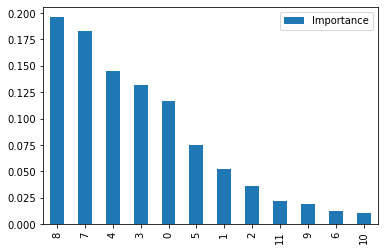

In [38]:
featureImportance.plot.bar()

In [39]:
X_train = np.delete(X_train, [6, 9 ,10, 11], axis = 1)
X_train.shape

(891, 8)

In [40]:
#testing it on my classifier again
scores = cvs(rfc, X_train, y_train, cv = 10, scoring = 'accuracy')
print("Scores: ", scores)
print('Mean Score: ', scores.mean()) 
print("Std Dev: ", scores.std())

Scores:  [0.76666667 0.84269663 0.78651685 0.87640449 0.84269663 0.85393258
 0.80898876 0.80898876 0.83146067 0.80898876]
Mean Score:  0.8227340823970037
Std Dev:  0.031223490628710906


In [ ]:
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}
from sklearn.model_selection import GridSearchCV
gs_clf = GridSearchCV(estimator=rfc, param_grid=param_grid, n_jobs=-1)
gs_clf.fit(X_train, y_train)
gs_clf.best_params_

In [ ]:
final_model = gs_clf.best_estimator_

In [ ]:
final_model.fit(X_train, y_train)
final_model.score(X_train, y_train)

In [ ]:
from sklearn.externals import joblib
joblib.dump(final_model, 'final_model')

In [ ]:
Y_test = test_data.copy()
Y_test = full_pipeline.transform(test_data)
Y_test = np.delete(Y_test, [0, 6, 9 ,10, 11], axis = 1)
Y_test.shape

In [ ]:
final_predictions = final_model.predict(Y_test)
final_predictions = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': final_predictions})
joblib.dump(final_predictions, 'final_predictions')
final_submission = final_predictions.to_csv(r'final_submission.csv', index = False)
joblib.dump(final_submission, 'final_submission')

In [ ]:
from IPython.display import FileLink
FileLink(r'final_submission.csv')